**2. Обзор типов визуализации**

**Система координат** — это способ определения положения точки в пространстве или на плоскости. Самая простая система координат — двумерная прямоугольная, или декартова. Каждой точке в этой системе соответствуют два значения: значение по оси **абсцисс** (x) и значение по оси **ординат** (y).

**Основные типы визуализации:**

- линейный график;

- гистограмма;

- диаграмма рассеяния;

- коробчатая диаграмма;

- круговая диаграмма;

- столбчатая диаграмма;

- тепловая карта.

**3. Знакомимся с новыми данными: коронавирус**

In [1]:
import pandas as pd

covid_data = pd.read_csv('data/covid_data/covid_data.csv')
display(covid_data.head())

,date,province/state,country,confirmed,deaths,recovered
0,01/22/2020,Anhui,China,1.0,0.0,0.0
1,01/22/2020,Beijing,China,14.0,0.0,0.0
2,01/22/2020,Chongqing,China,6.0,0.0,0.0
3,01/22/2020,Fujian,China,1.0,0.0,0.0
4,01/22/2020,Gansu,China,0.0,0.0,0.0


Столбцы:

- *date* — дата наблюдения;

- *province/state* — наименование провинции/штата;

- *country* — наименование страны;

- *confirmed* — общее число зафиксированных случаев на указанный день;

- *deaths* — общее число зафиксированных смертей на указанный день;

- *recovered* — общее число выздоровлений на указанный день.

2 `country_vaccinations` — данные о процессе вакцинирования людей в 221 стране мира. (источник данных)


In [2]:
vaccinations_data = pd.read_csv('data/covid_data/country_vaccinations/country_vaccinations.csv')
vaccinations_data = vaccinations_data[
    ['country', 'date', 'total_vaccinations', 
     'people_vaccinated', 'people_vaccinated_per_hundred',
     'people_fully_vaccinated', 'people_fully_vaccinated_per_hundred',
     'daily_vaccinations', 'vaccines']
]

display(vaccinations_data.head())

,country,date,total_vaccinations,people_vaccinated,people_vaccinated_per_hundred,people_fully_vaccinated,people_fully_vaccinated_per_hundred,daily_vaccinations,vaccines
0,Afghanistan,2021-02-22,0.0,0.0,0.0,NaN,NaN,NaN,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
1,Afghanistan,2021-02-23,NaN,NaN,NaN,NaN,NaN,1367.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
2,Afghanistan,2021-02-24,NaN,NaN,NaN,NaN,NaN,1367.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
3,Afghanistan,2021-02-25,NaN,NaN,NaN,NaN,NaN,1367.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
4,Afghanistan,2021-02-26,NaN,NaN,NaN,NaN,NaN,1367.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."


Столбцы:

- *country* — наименование страны;

- *date* — дата наблюдения;

- *total_vaccinations* — общее число введённых вакцин в стране на указанный день;

- *people_vaccinated* — общее число привитых первым компонентом в стране на указанный день;

- *people_vaccinated_per_hundred* — процент привитых первым компонентом в стране на указанный день (рассчитывается как );

- *people_fully_vaccinated* — общее число привитых вторым компонентом в стране на указанный день (первый компонент уже был введён им ранее);

- *people_fully_vaccinated_per_hundred* — процент привитых вторым компонентом в стране на указанный день (рассчитывается как );

- *daily_vaccination* — ежедневная вакцинация (число вакцинированных в указанный день);

- *vaccines* — комбинации вакцин, используемые в стране.

ОСОБЕННОСТИ ДАННЫХ

В таблице `covid_data` данные о заболеваемости представлены для каждого региона (штата) страны за каждый день. 

В таблице `vaccinations_data` параметры вакцинирования отображены для всех стран на каждый день, без учёта регионов.

В данных много пропусков, а также неверно введённых значений.

**Примечание.**

Обратите внимание, что признаки *confirmed*, *deaths*, *recovered*, *total_vaccination*, *people_vaccinated*, *people_fully_vaccinated* — это суммарные показатели по стране, то есть с каждым днём они должны расти. Такие признаки называют **накопительными**.

**Для объединения таблиц:**

1. В таблице `covid_data` необходимо предварительно рассчитать суммарное ежедневное число заболевших во всех провинциях/штатах в каждой стране.

2. В таблицах *не совпадает число стран*, а иногда и их *названия*. 

При объединении таблиц по столбцу мы определённо теряем данные (в данной задаче потери незначительны). Избежать этого можно ручными преобразованиями данных — искать различия в названиях стран в таблицах и преобразовывать их. Однако это не является темой данного модуля.

3. Таблицы имеют *разные периоды наблюдений* (вакцины появились позже, чем сам вирус). Объединив данные с типом *inner*, мы можем **потерять большое количество наблюдений** в таблице `covid_data`.

ПРЕДОБРАБОТКА ДАННЫХ


В таблице `covid_data`:

1. Группируем таблицу по *дате* и *названию* страны и рассчитываем суммарные показатели по всем регионам. Тем самым переходим от данных по регионам к данным по странам:

In [3]:
covid_data = covid_data.groupby(
    ['date', 'country'],
    as_index=False
)[['confirmed', 'deaths', 'recovered']].sum()

2. Преобразуем даты в формат `datetime` с помощью функции `pd.to_datetime()`:

In [4]:
covid_data['date'] = pd.to_datetime(covid_data['date'])

3. Создадим признак больных на данный момент (`active`). Для этого вычтем из общего числа зафиксированных случаев число смертей и число выздоровевших пациентов:

In [5]:
covid_data['active'] = covid_data['confirmed'] - covid_data['deaths'] - covid_data['recovered']

4. Создадим признак ежедневного **прироста** числа заболевших, умерших и выздоровевших людей. Для этого отсортируем данные по *названиям* стран, а затем по *датам*. После этого произведём группировку по странам и рассчитаем разницу между «вчера и сегодня» с помощью метода `diff()`:

In [6]:
# Сортируем таблицу по названиям стран и по датам
covid_data = covid_data.sort_values(by=['country', 'date'])
# Группируем по странам, рассчитываем разницу
# между "вчера" и "сегодня" с помощью метода diff()
covid_data['daily_confirmed'] = covid_data.groupby('country')['confirmed'].diff()
covid_data['daily_deaths'] = covid_data.groupby('country')['deaths'].diff()
covid_data['daily_recovered'] = covid_data.groupby('country')['recovered'].diff()

In [7]:
# Итоговый вид таблицы
display(covid_data.head())

,date,country,confirmed,deaths,recovered,active,daily_confirmed,daily_deaths,daily_recovered
11337,2020-02-24,Afghanistan,1.0,0.0,0.0,1.0,NaN,NaN,NaN
11570,2020-02-25,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0
11807,2020-02-26,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0
12051,2020-02-27,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0
12299,2020-02-28,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0


Для таблицы `vaccinations_data` достаточно преобразовать столбцы в формат `datetime`

In [8]:
vaccinations_data['date'] = pd.to_datetime(vaccinations_data['date'])

**Задание 3.1**

За какой период представлены данные в таблице `covid_data`? В качестве ответа введите даты в формате `datetime` (без указания времени).


**Подсказка (1 из 1):** Для определения периода можно найти *максимум* и *минимум* в столбце `date` таблицы `covid_data`.

In [9]:
max_date = covid_data['date'].max()
min_date = covid_data['date'].min()
print(min_date)
print(max_date)

2020-01-22 00:00:00
2021-05-29 00:00:00


**Задание 3.2**

За какой период представлены данные в таблице `vaccinations_data`? В качестве ответа введите даты в формате `datetime` без указания времени.

In [10]:
print(vaccinations_data['date'].min())
print(vaccinations_data['date'].max())

2020-12-02 00:00:00
2021-09-06 00:00:00


**Задание 3.3**

С помощью метода `merge()` объедините таблицы `covid_data` и `vaccinations_data` по столбцам `date` и `country`.

Тип объединения выставьте так, чтобы в результирующую таблицу попали **только** наблюдения за период, вычисленный в **задании 3.1**. То есть в результирующую таблицу должны попасть все записи из таблицы `covid_data` и из её пересечения с `vaccinations_data`, но не более. Результат объединения занесите в переменную covid_df.
Сохраните таблицу covid_df — она понадобится нам в следующем юните.

Сколько строк и столбцов в таблице covid_df?

**Подсказка (1 из 1):** Для объединения по нескольким столбцам передайте в параметр метода `merge()` список с именами ключей.

In [11]:
covid_df = covid_data.merge(vaccinations_data, on=['date', 'country'], how='left')
print('Число строк: ', covid_df.shape[0])
print('Число столбцов: ', covid_df.shape[1])

Число строк:  86785
Число столбцов:  16


In [12]:
covid_df['death_rate'] = covid_df['deaths'] / covid_df['confirmed'] * 100
covid_df['recover_rate'] = covid_df['recovered'] / covid_df['confirmed'] * 100
display(covid_df['death_rate'])

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
86780    NaN
86781    NaN
86782    NaN
86783    NaN
86784    NaN
Name: death_rate, Length: 86785, dtype: float64

**Задание 3.4**

Какова максимальная летальность в США (United States) за весь период? Ответ округлите до второго знака после запятой.

In [13]:
round(covid_df[covid_df['country'] == 'United States']['death_rate'].max(), 2)

7.19

**Задание 3.5**

Чему равен средний процент выздоровевших в России (Russia)? Ответ округлите до второго знака после запятой.

In [14]:
round(covid_df[covid_df['country'] == 'Russia']['recover_rate'].mean(), 2)

67.06

**4. Графические возможности библиотеки Pandas**

**Примечание.** Для визуализации Pandas использует библиотеку *matplotlib*, о которой мы поговорим в следующем юните. Если попробовать воспользоваться методами визуализации Pandas без предварительной установки *matplotlib*, вы получите ошибку `ImportError`. 

Для установки библиотеки используется стандартная команда, которую нужно выполнить в терминале:

`pip install matplotlib`

или в ячейке ноутбука:

`! pip install matplotlib`

БАЗОВАЯ ВИЗУАЛИЗАЦИЯ В PANDAS

Для создания простейших графиков используется метод `plot()`

**Основные параметры:**

- `x` — название признака, который будет отложен по оси абсцисс;

- `y` — название признака, который будет отложен по оси ординат;

- `figsize` — размер графика (кортеж из ширины и высоты в дюймах);

- `kind` —тип визуализации. Основные типы:

    -- `'line'` — линейный график (по умолчанию);

    -- `'bar'` — столбчатая диаграмма;

    -- `'barh'` — горизонтальная столбчатая диаграмма;

    -- `'hist'` — гистограмма;

    -- `'box'` — коробчатая диаграмма (boxplot);

    -- `'pie'` — круговая диаграмма;

    -- `'scatter'` — диаграмма рассеяния.

    -- `grid` — отображение сетки (по умолчанию False);

- `legend` — отображение легенды (по умолчанию False);
`title` — название графика;
`color` — цвет.

Начнем с **исследования заболеваемости**

Отобразим, как менялось ежедневное число заболевших (`daily_confirmed`) во всём мире во времени. 

Далее сгруппируем таблицу по датам и подсчитаем суммарное число зафиксированных случаев по дням.

<Axes: title={'center': 'Ежедневная заболеваемость во времени'}, xlabel='date'>

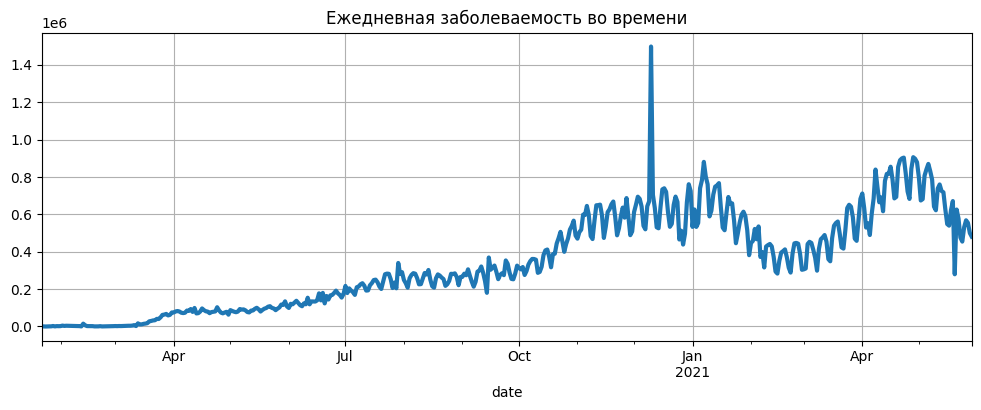

In [15]:
# Группируем по датам и считаем суммарное 
# число случаев по дням

grouped_cases = covid_df.groupby('date')['daily_confirmed'].sum()
# Строим график
grouped_cases.plot(
    kind='line',
    figsize=(12, 4),
    title='Ежедневная заболеваемость во времени',
    grid = True,
    lw=3
)

**Примечание**

В данном случае мы не использовали параметры `x` и `y`, т.к. переменная `grouped_cases` - это объект *Series*.

`plot()` может являться методом объекта типа *DataFrame* или *Series*.

**При типе *DataFrame* требуется указать `x` и `y`**, иначе будут построены графики для всех столбцов.

При типе *Series* в этом нет необходимости, т.к. это и есть один столбец данных (`у`) с индексами (`х`).

При этом по оси абсцисс (х) откладываются индексы (на сгруппированных данных `grouped_cases` индексы - это даты), а по оси ординат (у) - значения показателей.

*Здесь и далее в модуле точка с запятой в последней строке кода используется во избежание вывода на экран служебной информации в ноутбуке (попробуйте её убрать и посмотрите, что будет).*

Теперь построим **гистограмму**, которая покажет распределение ежедневной заболеваемости во всем мире

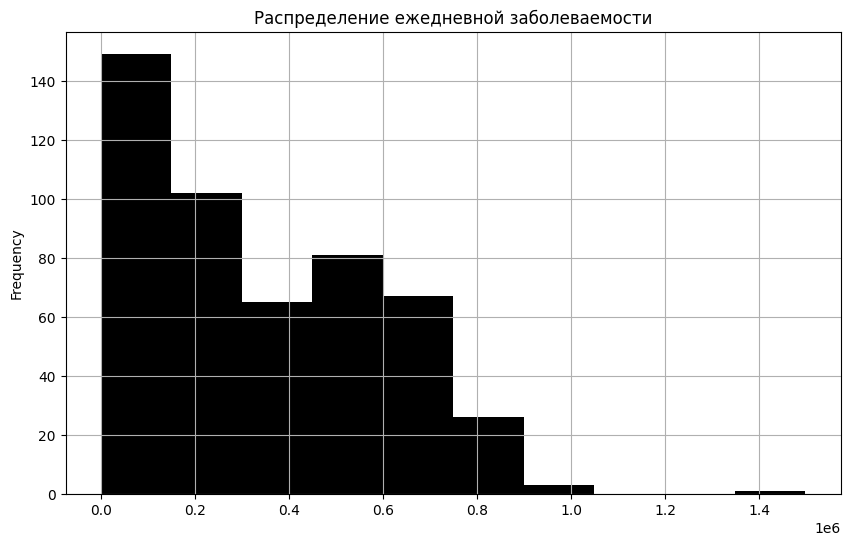

In [16]:
# За гистограмму отвечает параметр kind со значением 'hist'
# Параметр bins (корзины) - число прямоугольников

grouped_cases.plot(
    kind='hist',
    figsize=(10, 6),
    title='Распределение ежедневной заболеваемости',
    grid=True,
    color='black',
    bins=10
);

По гистограмме можно судить о частоте попадания ежедневной заболеваемости в определённый интервал. На оси абсцисс отложен диапазон ежедневной заболеваемости (в млн человек), разбитый на десять равных интервалов, на оси ординат — число наблюдений, попавших в этот интервал.

1. Мы видим модальное значение около нуля (от 0 до примерно 150 тыс. заболеваний в день), то есть большинство наблюдений сосредоточено в первом интервале, далее частота постепенно падает. Это связано с тем, что долгое время распространение вируса было довольно слабым.

2. В глаза бросается «пенёк», соответствующий резкой вспышке заболеваемости, которую мы видели ранее. Его высота очень мала, ведь такое наблюдение единственное. Даже на гистограмме кажется, что данное наблюдение является аномальным и, скорее всего, представляет собой выброс.

Построим **столбчатую диаграмму**, которая покажет топ-10 стран по суммарной заболеваемости

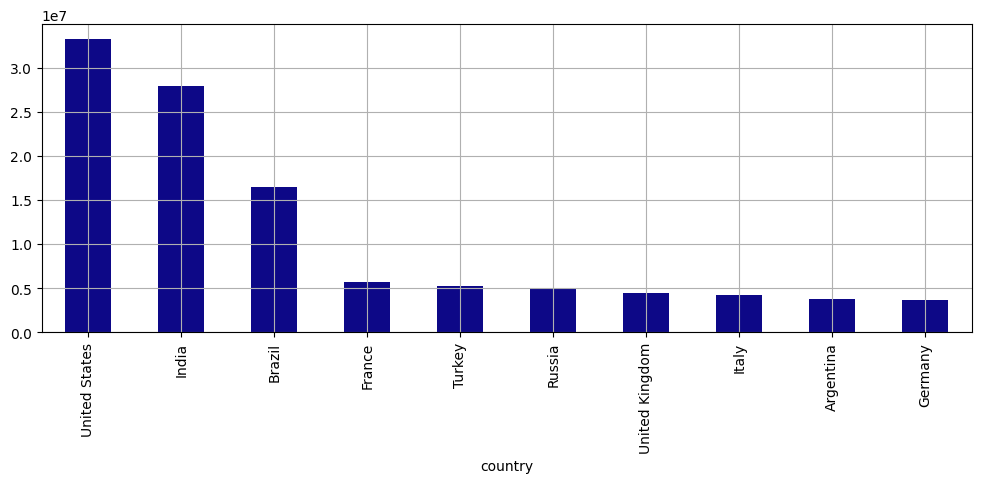

In [17]:
# сгруппируем данные по странам 
# и вычислим последний показатель с пом. агрегирующего
# метода last(), кот вернет последнее значение 
# в столбце DataFrame

grouped_country = covid_df.groupby(['country'])['confirmed'].last()

# Выделим топ-10 стран

grouped_country = grouped_country.nlargest(10)

# Строим столбчатую диаграмму 
# (парамерт kind со значением 'bar', colormap - цветовая гамма графика)
grouped_country.plot(
    kind='bar',
    grid=True,
    figsize=(12, 4),
    colormap='plasma'
);

Посмотрим, как в этих десяти странах соотносится количество заболевших и умерших от вируса. Для этого отобразим сразу два показателя на **столбчатой диаграмме**: 

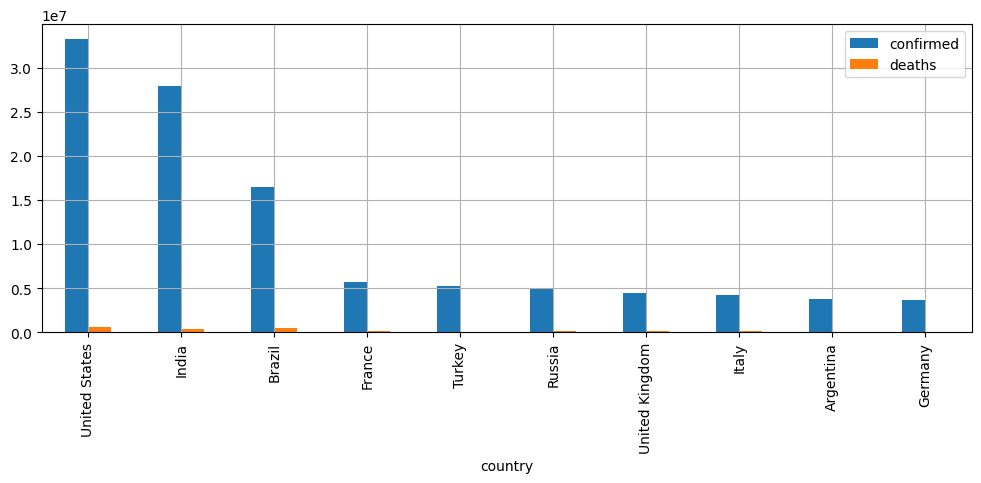

In [18]:
# Группируем страны по двум показателям и 
# выбираем последние значения
grouped_country = covid_df.groupby(['country'])[['confirmed', 'deaths']].last()
grouped_country = grouped_country.nlargest(10, columns=['confirmed'])
grouped_country.plot(
    kind='bar',
    grid=True,
    figsize=(12, 4)
);


На этом графике можем увидеть соотношение зафиксированных случаев заражения и смертей

Более того, если построить график с сортировкой не по числу заболевших, а по числу умерших, поменяются и места, и страны в рейтинге. Попробуйте построить такой график сами!

**Задание 4.4**

С помощью какого из перечисленных ниже вариантов кода можно построить столбчатую диаграмму для пяти стран с *наименьшим* общим числом вакцинаций на *последний* день рассматриваемого периода (`total_vaccinations`)?
В данном задании мы используем метод `nsmallest()`, который позволяет выбрать n *наименьших* значений в *Series*, а также метод `last()`, с помощью которого можно получить последнее непустое значение в группах.


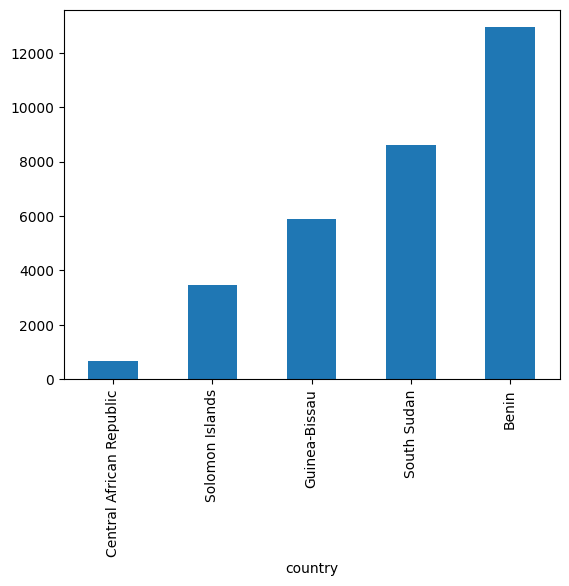

In [19]:
covid_df.groupby(['country'])['total_vaccinations'].last().nsmallest(5).plot(kind='bar');